In [3]:
import os
import csv
import re
import pandas as pd

# datanames = ['ST260_Day4','ST260_Day3','ST260_Day2','ST260_Day1']
# datanames = ['ST262_Day4','ST262_Day3','ST262_Day2','ST262_Day1']
# datanames = ['ST263_Day4','ST263_Day3','ST263_Day2','ST263_Day1']
# datanames = ['ST264_Day4','ST264_Day3','ST264_Day2','ST264_Day1']
datanames = ['ST260_Day4','ST260_Day3','ST260_Day2','ST260_Day1','ST262_Day4','ST262_Day3','ST262_Day2','ST262_Day1'
             ,'ST263_Day4','ST263_Day3','ST263_Day2','ST263_Day1','ST264_Day4','ST264_Day3','ST264_Day2','ST264_Day1']
serials = [0,1,2,3,4]
spike_metrics = ['spikes','cascade']
filename = '80epochs'

df = pd.DataFrame(columns=['dataname','serial','grouping method','firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std'])

for filename in ['80epochs']:
    for dataname in datanames:
        for serial in serials:
            run_as_a_whole_datapath = os.path.join(filename, dataname+'_'+str(serial))
            max_val_datapath = os.path.join(filename, dataname+'_cascade_GPFA_'+str(serial)+'_merged')
            random_datapath = os.path.join(filename, dataname+'_cascade_random_'+str(serial)+'_merged')
            kmeans_datapath = os.path.join(filename, dataname+'_cascade_GPFA_kmeans_'+str(serial)+'_merged')
            # dbscan_datapath = os.path.join( dataname+'_cascade_GPFA_dbscan_'+str(serial)+'_merged')
            datapaths = [run_as_a_whole_datapath, random_datapath,max_val_datapath,kmeans_datapath]
            grouping_type = ['whole','random','max_val','kmeans','dbscan']
            for spike_metric in spike_metrics:
                all_stats = {}
                for i in range(len(datapaths)):
                    txt_location = os.path.join( datapaths[i], 'metrics','plots_'+spike_metric,'stats.txt')
                    if os.path.exists(txt_location):
                        with open(txt_location,'r') as f:
                            stats = f.read()
                        firing_rate_KL_mean = re.findall('firing rate KL mean: ([\d\.]+),', stats)[0]
                        firing_rate_KL_std = re.findall('kL std ([\d\.]+)', stats)[0]
                        corr_coef_KL_mean = re.findall('correlation coefficient KL mean: ([\d\.]+),', stats)[0]
                        corr_coef_KL_std = re.findall('kl std ([\d\.]+)', stats)[0]
                        van_rossum_KL_mean = re.findall('van rossum KL mean: ([\d\.]+),', stats)[0]
                        van_rossum_KL_std = re.findall('kl std ([\d\.]+)', stats)[1]
                        all_stats[grouping_type[i]] = [firing_rate_KL_mean,corr_coef_KL_mean,van_rossum_KL_mean,
                        firing_rate_KL_std,corr_coef_KL_std,van_rossum_KL_std]
                        if spike_metric == 'cascade':
                            df.loc[len(df)] = [dataname,serial,grouping_type[i],float(firing_rate_KL_mean),float(corr_coef_KL_mean),float(van_rossum_KL_mean),float(firing_rate_KL_std),float(corr_coef_KL_std),float(van_rossum_KL_std)]

                all_stats_df = pd.DataFrame.from_dict(all_stats)
                if len(all_stats.keys()) >0:
                    metric_index = pd.Series(list(range(len(all_stats_df))))
                    metric_str_index = pd.Series(['firing_rate_kl_mean','corr_coef_kl_mean','van_rossum_kl_mean',
                                                    'firing_rate_kl_std','corr_coef_kl_std','van_rossum_kl_std'])
                    all_stats_df = all_stats_df.set_index([metric_index,metric_str_index])
                print(dataname,spike_metric,'experiment '+str(serial))
                print(all_stats_df)



ST260_Day4 spikes experiment 0
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  0.581905  0.994451  0.811776  0.910198
1 corr_coef_kl_mean    0.099037  0.095200  0.066594  0.194476
2 van_rossum_kl_mean   0.670853  0.686739  0.633720  0.711605
3 firing_rate_kl_std   0.880112  1.235416  1.389636  1.427157
4 corr_coef_kl_std     0.061517  0.059524  0.042999  0.100275
5 van_rossum_kl_std    0.342199  0.336070  0.317689  0.347806
ST260_Day4 cascade experiment 0
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  0.986973  1.235436  1.210178  0.965851
1 corr_coef_kl_mean    0.081500  0.151044  0.119446  0.200760
2 van_rossum_kl_mean   0.124069  0.129226  0.113795  0.154426
3 firing_rate_kl_std   1.549785  1.547256  2.036799  1.115377
4 corr_coef_kl_std     0.042769  0.040406  0.031048  0.099105
5 van_rossum_kl_std    0.061109  0.078410  0.055801  0.099554
ST260_Day4 spikes experiment 1
                          whole    ran

ST260_Day2 cascade experiment 4
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  1.050876  1.534493  1.612890  2.502646
1 corr_coef_kl_mean    0.124070  0.125437  0.118346  0.449936
2 van_rossum_kl_mean   0.108653  0.090914  0.087245  0.152646
3 firing_rate_kl_std   1.182774  2.579127  2.313011  3.744201
4 corr_coef_kl_std     0.069580  0.050538  0.039512  0.195047
5 van_rossum_kl_std    0.053323  0.043064  0.044488  0.051442
ST260_Day1 spikes experiment 0
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  0.839226  1.037877  1.260792  1.300201
1 corr_coef_kl_mean    0.057300  0.089106  0.056522  0.142544
2 van_rossum_kl_mean   0.580994  0.641398  0.695820  0.726928
3 firing_rate_kl_std   0.866244  1.082620  1.280642  1.426211
4 corr_coef_kl_std     0.033037  0.047732  0.034646  0.083083
5 van_rossum_kl_std    0.213742  0.252977  0.288482  0.322052
ST260_Day1 cascade experiment 0
                          whole    ra

ST263_Day2 cascade experiment 1
Empty DataFrame
Columns: []
Index: []
ST263_Day2 spikes experiment 2
Empty DataFrame
Columns: []
Index: []
ST263_Day2 cascade experiment 2
Empty DataFrame
Columns: []
Index: []
ST263_Day2 spikes experiment 3
Empty DataFrame
Columns: []
Index: []
ST263_Day2 cascade experiment 3
Empty DataFrame
Columns: []
Index: []
ST263_Day2 spikes experiment 4
Empty DataFrame
Columns: []
Index: []
ST263_Day2 cascade experiment 4
Empty DataFrame
Columns: []
Index: []
ST263_Day1 spikes experiment 0
                          whole     random    max_val    kmeans
0 firing_rate_kl_mean  6.850291  18.206570  21.083158  3.812323
1 corr_coef_kl_mean    2.311159   0.868741   1.081123  1.214443
2 van_rossum_kl_mean   5.076395   5.110434   9.821405  3.785426
3 firing_rate_kl_std   6.832709   6.792212   2.029742  3.476598
4 corr_coef_kl_std     1.777158   0.321496   0.341614  0.811251
5 van_rossum_kl_std    2.373803   2.253563   2.527604  1.256564
ST263_Day1 cascade experiment 0
  

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,dataname,serial,grouping method,firing_r_KL_mean,corr_c_KL_mean,van_r_KL_mean,firing_r_KL_std,corr_c_KL_std,van_r_KL_std
0,ST260_Day4,0,whole,0.986973,0.081500,0.124069,1.549785,0.042769,0.061109
1,ST260_Day4,0,random,1.235436,0.151044,0.129226,1.547256,0.040406,0.078410
2,ST260_Day4,0,max_val,1.210178,0.119446,0.113795,2.036799,0.031048,0.055801
3,ST260_Day4,0,kmeans,0.965851,0.200760,0.154426,1.115377,0.099105,0.099554
4,ST260_Day4,1,whole,0.923214,0.062414,0.131346,1.186032,0.035675,0.065229
5,ST260_Day4,1,random,1.441769,0.139256,0.113706,2.010772,0.034979,0.059170
6,ST260_Day4,1,max_val,1.095596,0.113025,0.105919,2.177840,0.029688,0.056882
7,ST260_Day4,1,kmeans,0.922295,0.274220,0.135229,0.934474,0.128156,0.078023
8,ST260_Day4,2,whole,0.851991,0.080947,0.150002,1.147363,0.049018,0.088176
9,ST260_Day4,2,random,1.453260,0.120533,0.104414,2.207095,0.033892,0.057249


In [5]:
grouping_methods_makes_the_data_valid = ['whole','random','max_val','kmeans']
dataname_filter = df.groupby('dataname').filter(lambda x: set(grouping_methods_makes_the_data_valid).issubset(set(x['grouping method'])))
df_filtered = df.loc[df['dataname'].isin(dataname_filter['dataname'])]
df_filtered

,dataname,serial,grouping method,firing_r_KL_mean,corr_c_KL_mean,van_r_KL_mean,firing_r_KL_std,corr_c_KL_std,van_r_KL_std
0,ST260_Day4,0,whole,0.986973,0.081500,0.124069,1.549785,0.042769,0.061109
1,ST260_Day4,0,random,1.235436,0.151044,0.129226,1.547256,0.040406,0.078410
2,ST260_Day4,0,max_val,1.210178,0.119446,0.113795,2.036799,0.031048,0.055801
3,ST260_Day4,0,kmeans,0.965851,0.200760,0.154426,1.115377,0.099105,0.099554
4,ST260_Day4,1,whole,0.923214,0.062414,0.131346,1.186032,0.035675,0.065229
5,ST260_Day4,1,random,1.441769,0.139256,0.113706,2.010772,0.034979,0.059170
6,ST260_Day4,1,max_val,1.095596,0.113025,0.105919,2.177840,0.029688,0.056882
7,ST260_Day4,1,kmeans,0.922295,0.274220,0.135229,0.934474,0.128156,0.078023
8,ST260_Day4,2,whole,0.851991,0.080947,0.150002,1.147363,0.049018,0.088176
9,ST260_Day4,2,random,1.453260,0.120533,0.104414,2.207095,0.033892,0.057249


In [6]:
whole = df_filtered.loc[df['grouping method'] == 'whole',['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)

In [7]:
random = df_filtered.loc[df['grouping method'] == 'random',['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)

In [8]:
max_val = df_filtered.loc[df['grouping method'] == 'max_val',['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)

In [9]:
kmeans = df_filtered.loc[df['grouping method'] == 'kmeans',['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)

In [10]:
print('whole')
print(whole)
print('random')
print(random)
print('max_val')
print(max_val)
print('kmeans')
print(kmeans)


whole
firing_r_KL_mean    1.063319
corr_c_KL_mean      0.145718
van_r_KL_mean       0.417171
firing_r_KL_std     1.468851
corr_c_KL_std       0.086062
van_r_KL_std        0.334380
dtype: float64
random
firing_r_KL_mean    1.467121
corr_c_KL_mean      0.232412
van_r_KL_mean       0.332328
firing_r_KL_std     2.221911
corr_c_KL_std       0.106547
van_r_KL_std        0.263954
dtype: float64
max_val
firing_r_KL_mean    1.446497
corr_c_KL_mean      0.241324
van_r_KL_mean       0.318860
firing_r_KL_std     2.044410
corr_c_KL_std       0.111274
van_r_KL_std        0.238176
dtype: float64
kmeans
firing_r_KL_mean    1.256614
corr_c_KL_mean      0.305073
van_r_KL_mean       0.354150
firing_r_KL_std     1.750432
corr_c_KL_std       0.163571
van_r_KL_std        0.256149
dtype: float64


Text(0.5, 1.0, 'Performance of Grouping Methods measured by Spike Metrics')

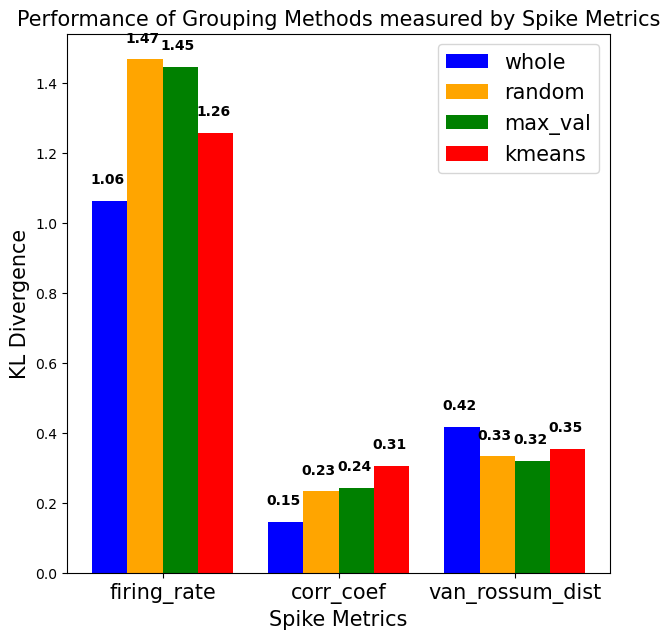

In [15]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['firing_rate', 'corr_coef', 'van_rossum_dist']
bar_width = 0.2
r1 = np.arange(3)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
fig = plt.figure(figsize=(7, 7))
plt.bar(r1, list(whole)[0:3], color='blue', width=bar_width, label='whole')
plt.bar(r2, list(random)[0:3], color='orange', width=bar_width, label='random')
plt.bar(r3,  list(max_val)[0:3], color='green', width=bar_width, label='max_val')
plt.bar(r4,  list(kmeans)[0:3], color='red', width=bar_width, label='kmeans')

txt_x_offset = -0.11
txt_y_offset = 0.05
for i in range(3):
    plt.text(x=r1[i]+txt_x_offset, y=whole[i]+txt_y_offset, s=f'{whole[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r2[i]+txt_x_offset, y=random[i]+txt_y_offset, s=f'{random[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r3[i]+txt_x_offset, y=max_val[i]+txt_y_offset, s=f'{max_val[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r4[i]+txt_x_offset, y=kmeans[i]+txt_y_offset, s=f'{kmeans[i]:.2f}', color='black', fontweight='bold')
    
plt.xticks([r + bar_width*1.5 for r in range(3)], labels,fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Spike Metrics',fontsize=15)
plt.ylabel('KL Divergence',fontsize=15)
plt.title('Performance of Grouping Methods measured by Spike Metrics',fontsize=15)
